In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score,classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

import pickle

import json

import os

In [2]:
%load_ext kedro.ipython

[07/08/24 18:29:00] INFO     Registered line magic '%reload_kedro'                                   ]8;id=271809;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=233396;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=621241;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=572583;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=991451;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=640581;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\Users\carga\Documents\KedroTutorial\montrealfirepredicition.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[07/08/24 18:29:02] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\integrations\kedro\hooks.py:13: KedroDeprecationWarning:                       
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\laz                
                             y_loader\__init__.py:83: KedroDeprecationWarning: 'GeoJSONDataSet' has                
                             been renamed to 'GeoJSONDataset', and the alias will be removed in                    
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project montrealfirepredicition                                  ]8;id=509666;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=990821;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=297797;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=704741;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[07/08/24 18:29:03] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\models\flowchart.py:13: KedroDeprecationWarning:                               
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\data_access\repositories\catalog.py:8: KedroDeprecationWarning:                
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

[07/08/24 18:29:04] INFO     Registered line magic 'run_viz'                                        ]8;id=315959;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=33781;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [3]:
table = catalog.load('input_table')

                    INFO     Loading data from input_table (CSVDataset)...                      ]8;id=206833;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=429068;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

[07/08/24 18:29:17] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_datasets\pandas\csv_dataset.py:163: DtypeWarning: Columns                          
                             (1,2,5,6,11,21,22,25) have mixed types. Specify dtype option on import                
                             or set low_memory=False.                                                              
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

In [5]:
def extract_sample(df, sample_size):
    # Calculate the fraction of the data to sample
    fraction = sample_size / len(df)

    # Extract a representative sample
    sample = df.sample(frac=fraction, random_state=42)  # Setting random_state for reproducibility

    return sample

In [6]:
sample_size = 10000
table_sample = extract_sample(table, sample_size)
table_sample.head()

,DISPATCHED_FIRE_STATION_ID,CREATION_DATE,INCIDENT_CATEGORY,INCIDENT_TYPE,LATITUDE,LONGITUDE,UNITS_DEPLOYED,INCIDENT_ID,CREATION_TIME,hour,...,AREA_BUILDING,DGUID,AVERAGE_FAMILY_SIZE,POPULATION_DENSITY,2021_POPULATION,building_age,LATITUDE_firestation,LONGITUDE_firestation,distance_to_fire_station,is_fire
1633553,54.0,2011-07-05,Sans incendie,Surchauffe - véhicule,45.456011,-73.862391,1.0,504669.0,2024-06-28 17:38:41,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,45.449093,-73.855993,0.872649,False
1338551,74.0,2013-02-15,Premier répondant,Premier répondant,45.505075,-73.653155,1.0,690161.0,2024-06-28 00:51:20,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,45.515268,-73.640780,1.487072,False
2403840,NaN,NaN,NaN,NaN,45.415206,-73.878672,NaN,NaN,NaN,NaN,...,511.0,NaN,NaN,NaN,NaN,48.0,45.428789,-73.868415,1.697095,False
1468161,19.0,2023-10-06,Premier répondant,Premier répondant,45.532432,-73.549429,2.0,1484116.0,2024-06-28 16:15:11,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,45.527982,-73.557968,1.022004,False
523434,9.0,2016-06-15,Premier répondant,Premier répondant,45.560606,-73.606204,1.0,1769253.0,2024-06-28 11:50:31,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,45.563748,-73.610169,0.668162,False


In [7]:
#table_sample.to_csv('C://Users//carga//Downloads//table_sample.csv', index=False)

In [112]:
def get_mode(series):
    mode = series.mode()
    if not mode.empty:
        return mode.iloc[0]
    else:
        return None  # or a default value like 'unknown'

# First, let's aggregate the data by grid_lat and grid_long
aggregated_data = table.groupby(['index_mesh', 'grid_lat', 'grid_long']).agg({
    'USE_CATEGORY': get_mode,
    'YEAR_CONSTRUCTION': 'mean',
    'is_fire': 'mean',  # Taking the mean to see the proportion of fire incidents
    'ABOVE_GROUND_FLOORS': 'mean',
    'AREA_BUILDING': 'mean',
    'AREA_LAND': 'mean',
    'HOUSING_UNITS':'mean',
    'distance_to_fire_station': 'mean',
    'building_age': 'mean',
    'time_of_day': get_mode,
    'day_of_week': get_mode,
    'month': get_mode,
    'AVERAGE_FAMILY_SIZE': 'mean',
    'POPULATION_DENSITY': 'mean',
    '2021_POPULATION': 'mean'    
}).reset_index()
# Handling categorical features after aggregation
categorical_features = ['USE_CATEGORY', 'time_of_day','day_of_week', 'month', 'index_mesh']
numerical_features = ['grid_lat', 'grid_long', 'ABOVE_GROUND_FLOORS', 'AREA_BUILDING', 'AREA_LAND', 'YEAR_CONSTRUCTION', 'HOUSING_UNITS', 'building_age', 'distance_to_fire_station', 'AVERAGE_FAMILY_SIZE', 'POPULATION_DENSITY', '2021_POPULATION']

# Fill missing categorical values with 'missing' and numerical with the mean
for col in categorical_features:
    aggregated_data[col].fillna('missing', inplace=True)

for col in numerical_features:
    aggregated_data[col].fillna(aggregated_data[col].mean(), inplace=True)

# Ensure all data types are correctly set for the pipeline
for col in categorical_features:
    aggregated_data[col] = aggregated_data[col].astype(str)

# Drop rows with missing target
aggregated_data.dropna(subset=['is_fire'], inplace=True)

# Convert 'is_fire' to a binary numerical column for classification purposes (e.g., threshold at 0.5)
aggregated_data['is_fire'] = (aggregated_data['is_fire'] > 0.5).astype(int)
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with SMOTE, preprocessing, and Random Forest model
pipeline_rf = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('regressor', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Prepare the data
features = categorical_features + numerical_features
X = aggregated_data[features]
y = aggregated_data['is_fire']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_rf.predict(X_test)
y_prob = pipeline_rf.predict_proba(X_test)[:, 1]

# Print out some evaluation metrics
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

[06/28/24 10:45:37] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       756
           1       0.00      0.00      0.00         7

    accuracy                           0.99       763
   macro avg       0.50      0.50      0.50       763
weighted avg       0.98      0.99      0.99       763

ROC AUC Score: 0.9126039304610734


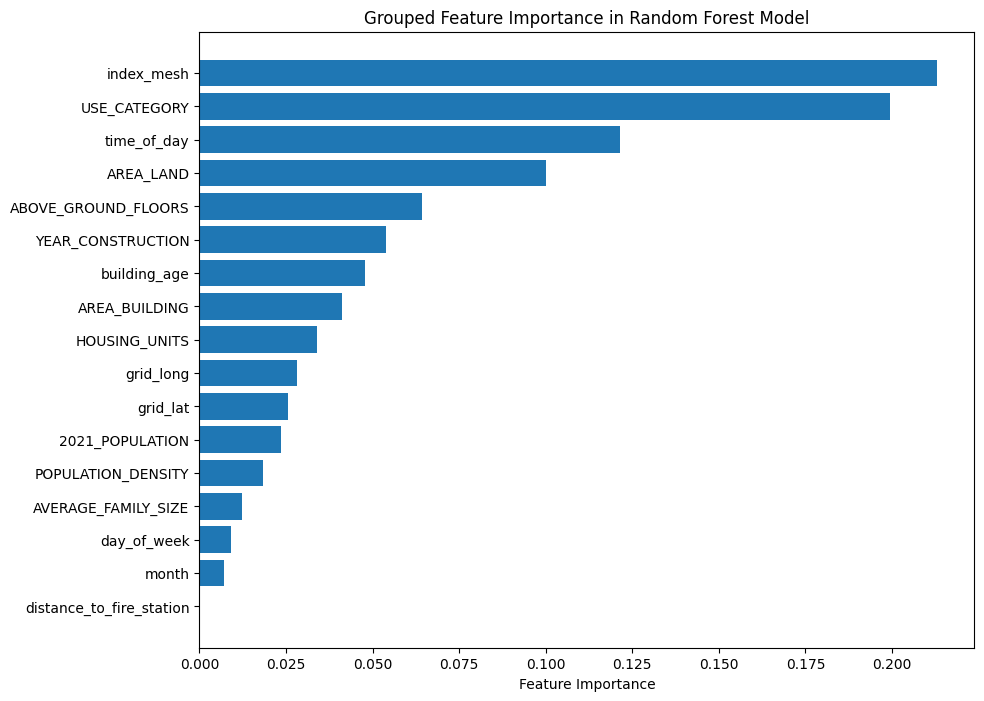

In [33]:
# Extract feature importance from the Random Forest model
feature_importances = pipeline_rf.named_steps['regressor'].feature_importances_

# Get the feature names from the preprocessing pipeline
categorical_transformer = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat']
onehot_feature_names = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
feature_names = numerical_features + list(onehot_feature_names)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Aggregate importance for categorical features
cat_feature_importance = {}
for col in categorical_features:
    cat_cols = [col_name for col_name in feature_names if col in col_name]
    total_importance = feature_importance_df[feature_importance_df['feature'].isin(cat_cols)]['importance'].sum()
    cat_feature_importance[col] = total_importance

# Create a DataFrame for grouped feature importances
grouped_feature_importance = pd.DataFrame({
    'feature': list(cat_feature_importance.keys()) + numerical_features,
    'importance': list(cat_feature_importance.values()) + [feature_importance_df[feature_importance_df['feature'] == col]['importance'].values[0] for col in numerical_features]
}).sort_values(by='importance', ascending=False)

# Plot grouped feature importances
plt.figure(figsize=(10, 8))
plt.barh(grouped_feature_importance['feature'], grouped_feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Grouped Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [20]:
print(table.columns)

Index(['DISPATCHED_FIRE_STATION_ID', 'INCIDENT_CATEGORY', 'INCIDENT_TYPE',
       'UNITS_DEPLOYED', 'INCIDENT_ID', 'CREATION_DATE', 'CREATION_TIME',
       'day_of_week', 'month', 'year', 'hour', 'time_of_day', 'index_mesh',
       'FIRE_STATION_ID', 'grid_long', 'grid_lat', 'ASSESSMENT_ID',
       'ABOVE_GROUND_FLOORS', 'HOUSING_UNITS', 'YEAR_CONSTRUCTION', 'USE_CODE',
       'USE_DESCRIPTION', 'USE_CATEGORY', 'AREA_LAND', 'AREA_BUILDING',
       'DGUID', 'AVERAGE_FAMILY_SIZE', 'POPULATION_DENSITY', '2021_POPULATION',
       'building_age', 'LATITUDE_firestation', 'LONGITUDE_firestation',
       'distance_to_fire_station', 'is_fire'],
      dtype='object')


In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

def get_mode(series):
    mode = series.mode()
    if not mode.empty:
        return mode.iloc[0]
    else:
        return None  # or a default value like 'unknown'

# Aggregate the data
aggregated_data = table.groupby(['index_mesh', 'grid_lat', 'grid_long']).agg({
    'is_fire': 'mean',
    'HOUSING_UNITS': 'mean',
    'building_age': 'mean',
    'day_of_week': get_mode,
    'month': get_mode,
    'time_of_day': get_mode,
    'USE_CATEGORY': get_mode,
    '2021_POPULATION': 'mean',
    'POPULATION_DENSITY': 'mean',
    'INCIDENT_ID': 'count',
    'YEAR_CONSTRUCTION': 'mean',
    'ABOVE_GROUND_FLOORS':'max',
    'AVERAGE_FAMILY_SIZE':'mean',
    'distance_to_fire_station': 'mean',
}).reset_index()

# Renaming the grouped variables
#aggregated_data = aggregated_data.rename(columns={
#    'USE_CATEGORY': 'USE_CATEGORY',
#    'YEAR_CONSTRUCTION_mean': 'AVG_YEAR_CONSTRUCTION',
#    'ABOVE_GROUND_FLOORS_mean': 'AVG_ABOVE_GROUND_FLOORS',
#    'AREA_BUILDING': 'AVG_AREA_BUILDING',
#    'AREA_LAND': 'AVG_AREA_LAND',
#    'distance_to_fire_station': 'AVG_DISTANCE_TO_FIRE_STATION',
#    'building_age': 'AVG_BUILDING_AGE',
#    'time_of_day': 'MOST_COMMON_TIME_OF_THE_DAY'
#})

# Handling categorical and numerical features
categorical_features = ['time_of_day', 'day_of_week', 'month', 'index_mesh', 'USE_CATEGORY']
numerical_features = ['grid_lat', 'grid_long', 'HOUSING_UNITS', 'building_age', '2021_POPULATION', 'INCIDENT_ID', 'YEAR_CONSTRUCTION', 'POPULATION_DENSITY', 'ABOVE_GROUND_FLOORS', 'AVERAGE_FAMILY_SIZE', 'distance_to_fire_station']

# Fill missing values for count of incidents
aggregated_data['INCIDENT_ID'].fillna(0, inplace=True)

# Fill missing values for use categories of a building
aggregated_data['USE_CATEGORY'].fillna(aggregated_data['USE_CATEGORY'].mode()[0], inplace=True)

# Fill missing values
for col in categorical_features:
    aggregated_data[col].fillna('missing', inplace=True)
for col in numerical_features:
    aggregated_data[col].fillna(aggregated_data[col].mean(), inplace=True)

# Ensure correct data types
for col in categorical_features:
    aggregated_data[col] = aggregated_data[col].astype(str)

# Drop rows with missing target
aggregated_data.dropna(subset=['is_fire'], inplace=True)

# Convert 'is_fire' to binary
aggregated_data['is_fire'] = (aggregated_data['is_fire'] > 0.5).astype(int)

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with SMOTEENN, preprocessing, and XGBoost model
pipeline_xgb = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('resample', SMOTEENN(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Prepare the data
features = categorical_features + numerical_features
X = aggregated_data[features]
y = aggregated_data['is_fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [9],
    'classifier__learning_rate': [0.1],
    'classifier__subsample': [0.6],
    'classifier__colsample_bytree': [0.6],
    'classifier__gamma': [0, 0.4],
    'classifier__min_child_weight': [1, 5, 7],
    'classifier__reg_alpha': [0, 0.5, 1],
    'classifier__reg_lambda': [1, 3]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

# Use the best estimator to predict on the test set
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Print out evaluation metrics for the best model
print(classification_report(y_test, y_pred_best_xgb))
print("Best ROC AUC Score on Test Set:", roc_auc_score(y_test, y_prob_best_xgb))

# Cross-validation for the best XGBoost model
cv_scores_xgb = cross_val_score(best_xgb, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-validated ROC AUC Score for XGBoost: {cv_scores_xgb.mean()}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[07/08/24 18:48:47] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgb                
                             oost\core.py:158: UserWarning: [18:48:47] WARNING:                                    
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06                
                             abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

Best parameters: {'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 9, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 100, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 1, 'classifier__subsample': 0.6}
Best ROC AUC Score: 0.9760163486150304
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1131
           1       0.50      0.22      0.31         9

    accuracy                           0.99      1140
   macro avg       0.75      0.61      0.65      1140
weighted avg       0.99      0.99      0.99      1140

Best ROC AUC Score on Test Set: 0.9482267413301896
Cross-validated ROC AUC Score for XGBoost: 0.9667770062052694


In [ ]:
# Print the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best ROC AUC Score: {best_score}")

# Use the best estimator to predict on the test set
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Print out evaluation metrics for the best model
classification_report_str = classification_report(y_test, y_pred_best_xgb)
test_roc_auc_score = roc_auc_score(y_test, y_prob_best_xgb)
print(classification_report_str)
print("Best ROC AUC Score on Test Set:", test_roc_auc_score)

# Cross-validation for the best XGBoost model
cv_scores_xgb = cross_val_score(best_xgb, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
cv_mean_score = cv_scores_xgb.mean()
print(f"Cross-validated ROC AUC Score for XGBoost: {cv_mean_score}")

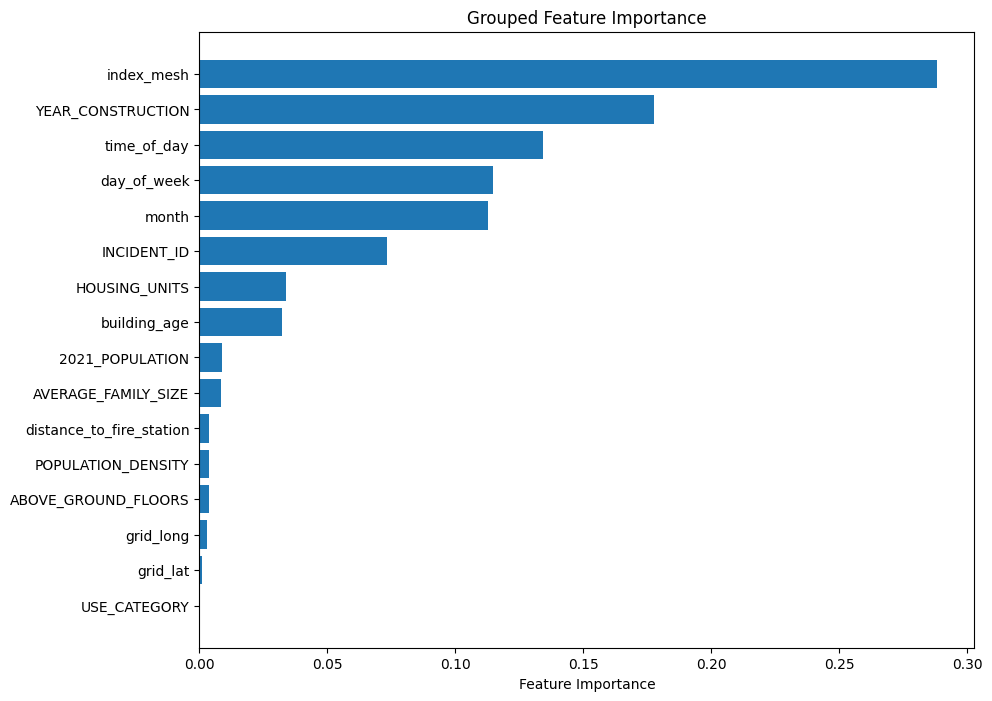

In [19]:
# Extract feature importance from the Random Forest model
feature_importances = best_xgb.named_steps['classifier'].feature_importances_

# Get the feature names from the preprocessing pipeline
categorical_transformer = best_xgb.named_steps['preprocessor'].named_transformers_['cat']
onehot_feature_names = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
feature_names = numerical_features + list(onehot_feature_names)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Aggregate importance for categorical features
cat_feature_importance = {}
for col in categorical_features:
    cat_cols = [col_name for col_name in feature_names if col in col_name]
    total_importance = feature_importance_df[feature_importance_df['feature'].isin(cat_cols)]['importance'].sum()
    cat_feature_importance[col] = total_importance

# Create a DataFrame for grouped feature importances
grouped_feature_importance = pd.DataFrame({
    'feature': list(cat_feature_importance.keys()) + numerical_features,
    'importance': list(cat_feature_importance.values()) + [feature_importance_df[feature_importance_df['feature'] == col]['importance'].values[0] for col in numerical_features]
}).sort_values(by='importance', ascending=False)

# Plot grouped feature importances
plt.figure(figsize=(10, 8))
plt.barh(grouped_feature_importance['feature'], grouped_feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Grouped Feature Importance')
plt.gca().invert_yaxis()
plt.show()

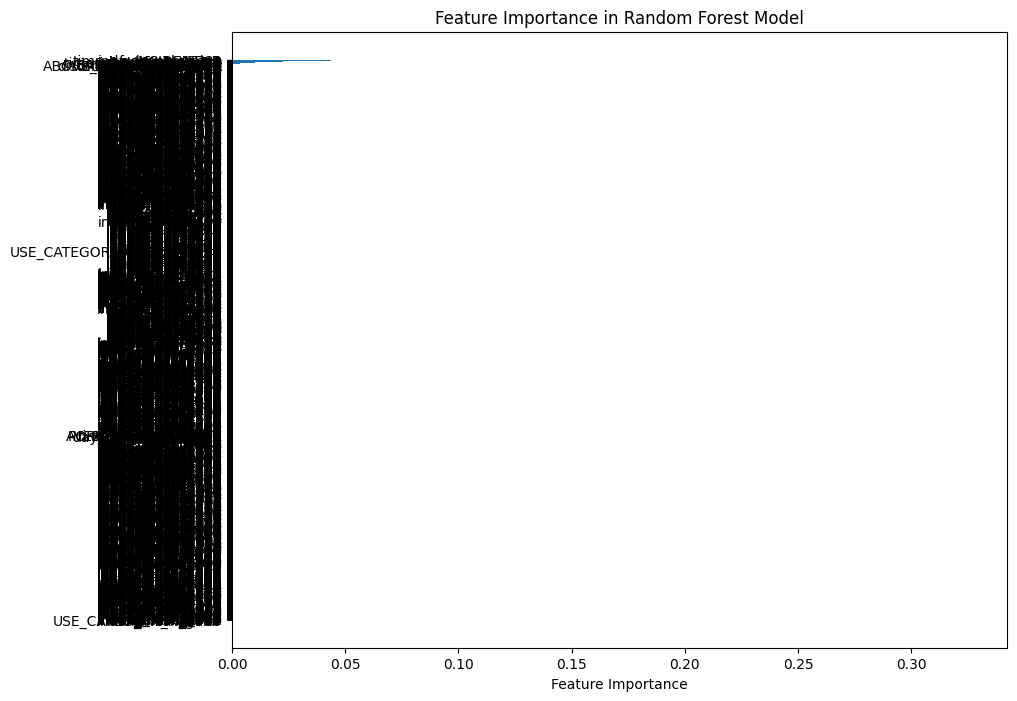

In [23]:
# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

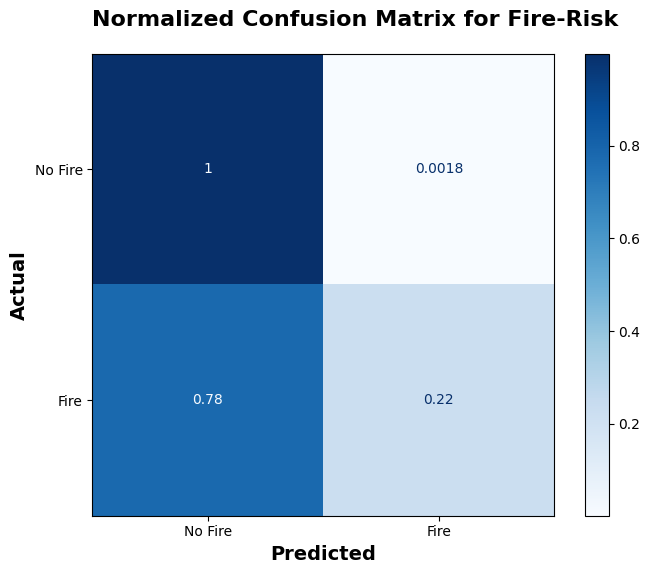

In [16]:
# Confusion Matrix
target_names = ['No Fire', 'Fire']
cm = confusion_matrix(y_test, y_pred_best_xgb, normalize='true')

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Add title and axis labels
title_font = {'size': 16, 'weight': 'bold', 'ha': 'left'}
ax.set_title("Normalized Confusion Matrix for Fire-Risk",
             fontdict=title_font, loc='left', pad=20)
plt.ylabel('Actual', fontsize=14, fontweight="bold")
plt.xlabel('Predicted', fontsize=14, fontweight="bold")
plt.show()